In [1]:
#golda0.99 and Horina=0.99 detected accurately
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten, AvgPool2D, BatchNormalization, LeakyReLU
from tensorflow.keras.utils import plot_model
import pydot
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

Using TensorFlow backend.


In [2]:
testing_path = 'F:\\Research database\\Shrimp Recognition\\validating\\' 
training_path = 'F:\\Research database\\Shrimp Recognition\\training\\'
from keras.preprocessing.image import ImageDataGenerator
train_datagen =  ImageDataGenerator(
    rescale = 1./255,
)
test_datagen = ImageDataGenerator(
    rescale = 1./255
    )

train_dataset = train_datagen.flow_from_directory(training_path,target_size = (224,224),batch_size = 32,)
test_dataset = test_datagen.flow_from_directory(testing_path,target_size = (224,224),batch_size = 32,)

""".fit is used when the entire training dataset can fit into the memory and no data augmentation is applied.
.fit_generator is used when either we have a huge dataset to fit into our memory or when data augmentation needs to be applied.
"""


Found 38042 images belonging to 4 classes.
Found 4681 images belonging to 4 classes.


'.fit is used when the entire training dataset can fit into the memory and no data augmentation is applied.\n.fit_generator is used when either we have a huge dataset to fit into our memory or when data augmentation needs to be applied.\n'

In [3]:
model = Sequential()
# 1st conv block
model.add(Conv2D(64, (3, 3), activation='relu', strides=(2, 2),input_shape=(224,224,3), padding='valid'))
model.add(Conv2D(64, (3, 3), activation='relu', strides=(2, 2), padding='same'))
model.add(MaxPool2D(pool_size=(2, 2), padding='same'))
# 2nd conv block
model.add(Conv2D(128, (3, 3), activation='relu', strides=(2, 2), padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', strides=(2, 2), padding='same'))
model.add(MaxPool2D(pool_size=(2, 2), padding='same'))

model.add(Conv2D(256, (3, 3), activation='relu', strides=(2, 2), padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', strides=(2, 2), padding='same'))
model.add(MaxPool2D(pool_size=(2, 2), padding='same'))

model.add(Conv2D(512, (3, 3), activation='relu', strides=(2, 2), padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', strides=(2, 2), padding='same'))
model.add(MaxPool2D(pool_size=(2, 2), padding='same'))

# hidden layer
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.1))
# output layer
model.add(Dense(4, activation='softmax'))
# compiling the sequential model
model.summary() 


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 111, 111, 64)      1792      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 128)         147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 2, 2, 256)        

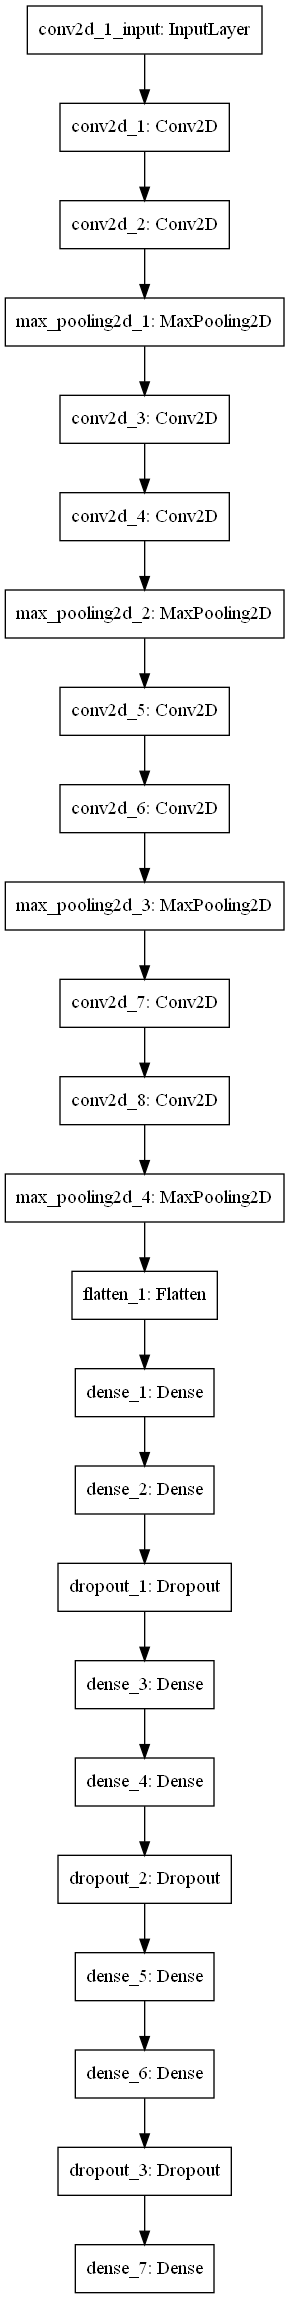

In [4]:
# import os
# os.environ["PATH"] += os.pathsep + r'C:\Program Files\Graphviz\bin'
plot_model(model,to_file='model_2.png')

In [5]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [6]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("Shrimp_model_2.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='max', period=1)
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=15, verbose=1, mode='max')

In [7]:
history = model.fit(
    train_dataset,
    validation_data = test_dataset,
    epochs = 50,
    steps_per_epoch = len(train_dataset),
    validation_steps = len(test_dataset),
    verbose=1,
    callbacks=[checkpoint,early],
    shuffle=True,
    workers = 5
)

Epoch 1/50
1189/1189 [==============================] - 124s 104ms/step - loss: 0.7452 - accuracy: 0.6426 - val_loss: 0.3085 - val_accuracy: 0.7783

Epoch 00001: val_accuracy improved from -inf to 0.77825, saving model to Shrimp_model_2.h5
Epoch 2/50
1189/1189 [==============================] - 112s 94ms/step - loss: 0.2689 - accuracy: 0.8890 - val_loss: 0.0679 - val_accuracy: 0.8778

Epoch 00002: val_accuracy improved from 0.77825 to 0.87780, saving model to Shrimp_model_2.h5
Epoch 3/50
1189/1189 [==============================] - 113s 95ms/step - loss: 0.2622 - accuracy: 0.8828 - val_loss: 0.2614 - val_accuracy: 0.8445

Epoch 00003: val_accuracy did not improve from 0.87780
Epoch 4/50
1189/1189 [==============================] - 117s 99ms/step - loss: 0.1108 - accuracy: 0.9681 - val_loss: 0.0109 - val_accuracy: 0.9628

Epoch 00004: val_accuracy improved from 0.87780 to 0.96283, saving model to Shrimp_model_2.h5
Epoch 5/50
1189/1189 [==============================] - 120s 101ms/step -

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


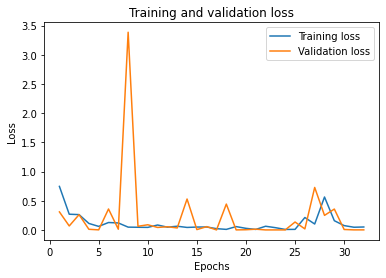

In [8]:
history_dict = history.history
print(history_dict.keys())
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['accuracy']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss_values, label="Training loss")
plt.plot(epochs, val_loss_values, label='Validation loss')
plt.title("Training and validation loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# plt.savefig("Model_2_trainingVsvalidationLoss.jpeg")
plt.show()


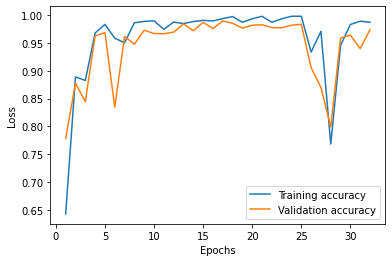

In [9]:
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']
plt.plot(epochs, accuracy, label='Training accuracy')
plt.plot(epochs, val_accuracy, label='Validation accuracy')
plt.xlabel("Epochs")
plt.ylabel('Loss')
plt.legend()
# plt.savefig("Model_1_trainingVsvalidationAccuracy.jpeg")
plt.show()

In [10]:
import pandas as pd 
his_df = pd.DataFrame(history_dict)

In [11]:
his_df.to_excel('model_2_history.xlsx',index=False)